# Transpressional deformation

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy import linalg as la

Here we will examine strain evolution during transpression deformation. Transpression (Sanderson and Marchini, 1984) is considered as a wrench or transcurrent shear accompanied by horizontal shortening across, and vertical lengthening along, the shear plane.

<img width="65%" src="images/trasnpression.png">

Velocity gradient associated with transpressional deformation is defined as: $ \mathbf{L} = \begin{bmatrix} 0 & \dot{\gamma} & 0 \\ 0 & -\dot{\varepsilon} & 0 \\ 0 & 0 & \dot{\varepsilon} \end{bmatrix} $, where $\dot{\gamma}$ and $\dot{\varepsilon}$ are components of bulk strain rate in direction of convergence.

At first, we will define function to calculate symmetry and intensity of deformation from defoirmation gradient.

In [3]:
def KDparams(F):
    u, s, v = svd(F)
    Rxy = s[0]/s[1]
    Ryz = s[1]/s[2]
    K = (Rxy-1)/(Ryz-1)
    D = sqrt((Rxy-1)**2 + (Ryz-1)**2)
    return K, D

Here we define some constants including bulk strain rate.

In [4]:
yearsec = 365.25*24*3600
sr = 3e-15

We define 2D arrays of angles and times to be examined...

In [5]:
times = linspace(0.00000001,10,20)
alphas = linspace(0,90,20)
time, alpha = meshgrid(times, alphas)
K = zeros_like(alpha)
D = zeros_like(alpha)

and l;oop over to calculate symmetry and intensity for each combination

In [6]:
for (r,c) in np.ndindex(alpha.shape):
    a = deg2rad(alpha[r,c])
    t = time[r,c]*1e6*yearsec
    edot = sr*sin(a)
    gdot = sr*cos(a)
    L = array([[0, gdot, 0], [0, -edot, 0],[0, 0, edot]])
    F = la.expm(L*t)
    K[r,c], D[r,c] = KDparams(F)
    

Now we can plot results.

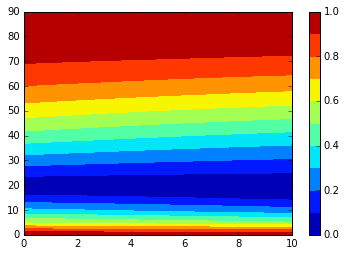

In [7]:
contourf(time, alpha, K, linspace(0, 1, 11))
colorbar()

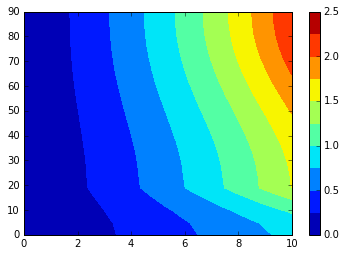

In [8]:
contourf(time, alpha, D, linspace(0, 2.5, 11))
colorbar()

In [9]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./css/sg2.css", "r").read()
    return HTML(styles)
css_styling()